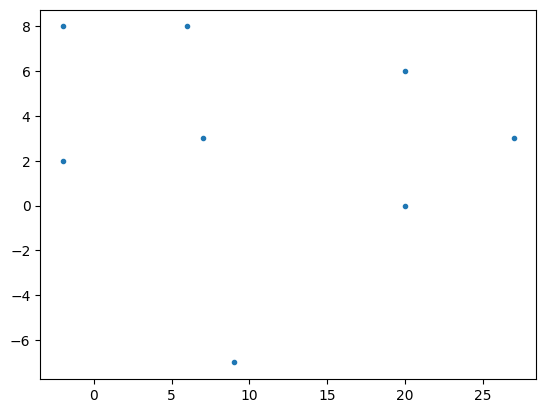

In [1]:
import numpy as np
import matplotlib.pyplot as plt

point_cloud = np.array([[-2.0,8.0],
                        [6.0,8.0],
                        [-2.0,2.0],
                        [7.0,3.0],
                        [27.0, 3.0],
                        [20.0,6.0],
                        [20.0,0.0],
                        [9.0,-7.0]
                        ])

plt.plot(point_cloud[:,0], point_cloud[:,1], '.')

In [ ]:
## Visualize Vietoris-Rips Complex

from matplotlib.patches import Circle,Polygon

euler_characteristic = []
euler_characteristic_tuple = []

for i in range(200):
    global plt
    v = len(point_cloud)
    e = 0
    f = 0

    epsilon = i/10   # distance parameter
    m = len(point_cloud)    # the number of points in given point cloud
    adj_mat = np.zeros((m,m))

    ## Assume that the metric for our point cloud is Euclidean distance.
    def Euclidean_distance(x,y):
        norm = np.dot(x-y,x-y)
        return np.sqrt(norm)
    
    plt.figure(figsize=(20,9))
    plt.subplot(1,2,1)
    ## Step 1. For each point p, draw a circle with radius epsilon and center p
    plt.plot(point_cloud[:,0], point_cloud[:,1], '.')
    for i in range(0,len(point_cloud)):
        plt.gca().add_patch(Circle(point_cloud[i], radius = epsilon, alpha = 0.3))
        plt.annotate(f'{i+1}',(point_cloud[i]))


    ## Step 2. If the distance between two points x and y is less than epsilon, connect two points with edge.
    for x,i in zip(point_cloud,np.arange(m)):
        for y,j in zip(point_cloud,np.arange(m)):
            if 0 < Euclidean_distance(x,y) < epsilon:
                plt.plot([x[0],y[0]],[x[1],y[1]],'-')
                adj_mat[i,j] = 1
                adj_mat[j,i] = 1
                e += 1


    ## Step 3. If three edges consist of a triangle, fill in the face of the triangle.
    for i in range(0,m):
        for j in range(0,m):
            for k in range(0,m):
                if (adj_mat[i,j] == 1) & (adj_mat[j,k] == 1) & (adj_mat[k,i] == 1):
                    plt.gca().add_patch(Polygon((point_cloud[i],point_cloud[j],point_cloud[k]), facecolor = 'm'))
                    f += 1

    plt.title(f'Vietoris-Rips complex of point cloud for $\epsilon$ = {epsilon}, v={v}, e={e//2}, f={f//6}, EC={v-(e//2)+(f//6)}', fontsize = 14)
    euler_characteristic.append(v-(e//2)+(f//6))
    euler_characteristic_tuple.append((v, v-(e//2), v-(e//2)+(f//6)))
    plt.xlim(np.min(point_cloud)-epsilon,np.max(point_cloud)+epsilon)
    plt.ylim(np.min(point_cloud)-epsilon,np.max(point_cloud)+epsilon)
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.title('Euler Characteristic')
    plt.scatter(range(len(euler_characteristic)), euler_characteristic)
    plt.xlim([0, 210])
    plt.ylim([-0.5,9.5])
plt.show()

50
60
76
80
90
100
H1
101
102
H1
130
152
H1
161
H1
170
H1
186
H1


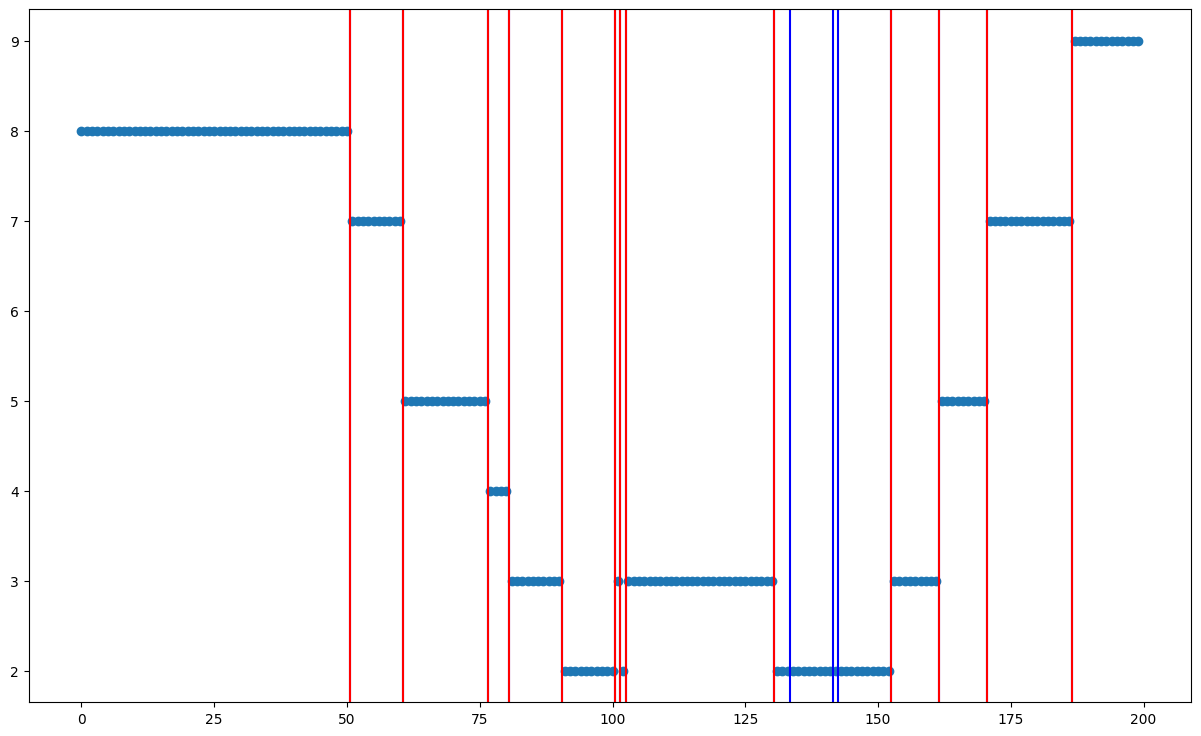

In [3]:
plt.figure(figsize=[15, 9])
for i in range(len(euler_characteristic)-1):
    if euler_characteristic_tuple[i][1] != euler_characteristic_tuple[i+1][1]:
        plt.axvline(x=(2*i+1)/2, color='b')
for i in range(len(euler_characteristic)-1):
    if euler_characteristic[i] != euler_characteristic[i+1]:
        print(i)
        if euler_characteristic[i] < euler_characteristic[i+1]:
            print('H1')
        plt.axvline(x=(2*i+1)/2, color='r')
plt.scatter(range(len(euler_characteristic)), euler_characteristic)
plt.show()

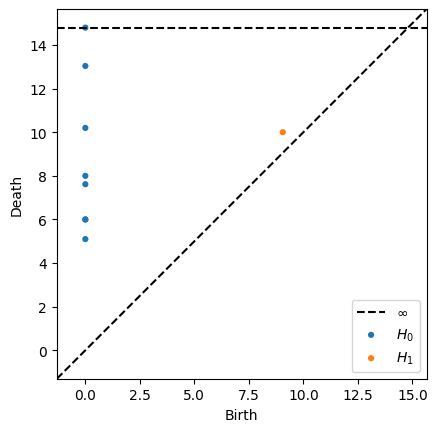

In [4]:
from ripser import ripser
from persim import plot_diagrams
diagrams = ripser(point_cloud)['dgms']
plot_diagrams(diagrams, show=True)